In [1]:
# @title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/input_files/distan_lat42.34lon-8.834p3R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
# @title Get station and sample max gust hour before
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/input_files/udra.csv", usecols = ["time","gust_udr"],parse_dates=["time"]).set_index("time")


#delete duplicated
station = station[~station.index.duplicated(keep='first')]

#resample max hour before

station = station.resample("H",label="right",closed="right").max()
print("Variable statistics")
print(station.describe())

Variable statistics
           gust_udr
count  17472.000000
mean       7.304766
std        4.799445
min        0.000000
25%        3.777781
50%        5.916671
75%        9.583341
max       34.472250


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16606 entries, 2022-01-01 01:00:00 to 2023-12-30 23:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_o       16606 non-null  float64
 1   dir0         16606 non-null  float64
 2   snow_prec0   16606 non-null  float64
 3   snowlevel0   16606 non-null  float64
 4   mod0         16606 non-null  float64
 5   wind_gust0   16606 non-null  float64
 6   mslp0        16606 non-null  float64
 7   temp0        16606 non-null  float64
 8   rh0          16606 non-null  float64
 9   visibility0  16606 non-null  float64
 10  lhflx0       16606 non-null  float64
 11  lwflx0       16606 non-null  float64
 12  conv_prec0   16606 non-null  float64
 13  prec0        16606 non-null  float64
 14  swflx0       16606 non-null  float64
 15  shflx0       16606 non-null  float64
 16  cape0        16606 non-null  float64
 17  cin0         16606 non-null  float64
 18  cfh0       

None

best correlation observed and meteorological model variables
gust_o        1.000000
wind_gust0    0.863307
wind_gust1    0.859393
wind_gust2    0.858373
mod2          0.827428
mod0          0.827022
mod1          0.822419
cape2         0.354230
cape0         0.352620
cape1         0.349756
Name: gust_o, dtype: float64


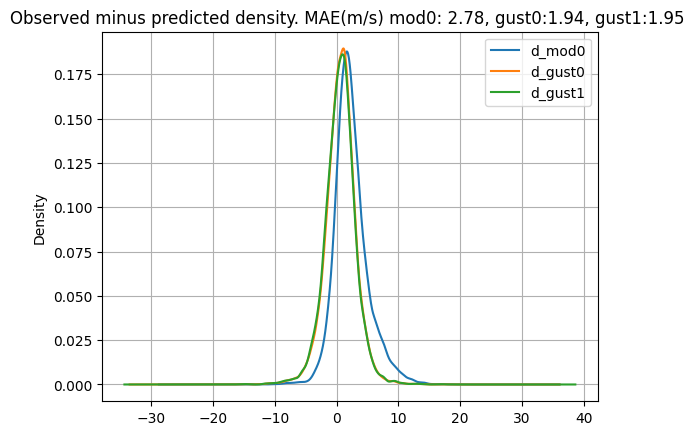

In [5]:
# @title Get meteorologic model d0 .Concatenate with station. MAE (m/s) meteorological model variables and observed variables. Select best point and variable from the meteorological model

from sklearn.metrics import mean_absolute_error

#rename columns
station = station.rename(columns={"gust_udr":"gust_o"})

#load meteorological model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/input_files/lat42.34lon-8.834p3R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time").drop_duplicates()

df_all = pd.concat([station,met_model],axis=1).dropna()
display(df_all.info())

# best correlation observed and meteorological model
print("best correlation observed and meteorological model variables")
print(df_all.corr()["gust_o"].sort_values(ascending=False).head(10))

#errors (MAE) in m/s and differences
e_mod0= mean_absolute_error(df_all.gust_o, df_all.mod0)
d_mod0 = df_all.gust_o.values-df_all.mod0.values
e_mod1 = mean_absolute_error(df_all.gust_o, df_all.mod1)
d_mod1 = df_all.gust_o.values-df_all.mod1.values

e_gust0 = mean_absolute_error(df_all.gust_o, df_all.wind_gust0)
d_gust0 = df_all.gust_o.values-df_all.wind_gust0.values
e_gust1 = mean_absolute_error(df_all.gust_o, df_all.wind_gust1)
d_gust1 = df_all.gust_o.values-df_all.wind_gust1.values # lowest value
e_gust2 = mean_absolute_error(df_all.gust_o, df_all.wind_gust2)
d_gust2 = df_all.gust_o.values-df_all.wind_gust2.values

#Select best point and variable from the meteorological model
mae_met = round(e_gust1,2)

pd.DataFrame({"d_mod0":d_mod0,"d_mod0":d_mod0,"d_gust0":d_gust0,"d_gust1":d_gust1,
              }).plot(kind="kde", grid=True,
                      title ="Observed minus predicted density. MAE(m/s) mod0: {:0.2f}, gust0:{:0.2f}, gust1:{:0.2f} ".format(e_mod0,e_gust0,e_gust1));


machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.232112     7.286853     0.054742
std       4.723555     4.271063     2.348361
min       0.000000     1.765279   -11.830704
25%       3.833336     4.245837    -1.260557
50%       5.861116     5.807644     0.150833
75%       9.361119     9.039452     1.368612
max      31.750025    26.677382    16.452513
machine learning number: 1
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.124011     7.183477     0.059466
std       4.534450     4.060148     2.440764
min       0.027778     2.186946   -10.855981
25%       3.750003     4.285281    -1.330557
50%       5.944449     5.857088     0.156389
75%       9.222230     8.962091     1.342084
max      27.972245    25.334881    16.355291
machine learning number: 2
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.238901 

,MAE
count,10.000000
mean,1.716000
std,0.040056
min,1.650000
25%,1.682500
50%,1.735000
75%,1.740000
max,1.770000


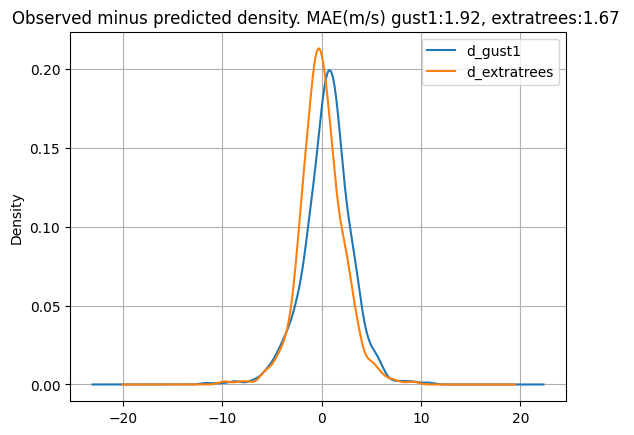

In [6]:
# @title Extratreesregressor


from sklearn.ensemble import ExtraTreesRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = ExtraTreesRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_extratrees"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_extratrees = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results[["d_gust1","d_extratrees"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, extratrees:{:0.2f} ".format(e_gust1,e_extratrees));

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 14945, number of used features: 7
[LightGBM] [Info] Start training from score 7.355959
machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.232112     7.296092     0.063980
std       4.723555     4.257054     2.348670
min       0.000000     2.504875   -12.053575
25%       3.833336     4.229058    -1.221796
50%       5.861116     5.879943     0.120643
75%       9.361119     9.016086     1.306838
max      31.750025    26.277455    16.924510
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of dat

,MAE
count,10.000000
mean,1.697000
std,0.018288
min,1.660000
25%,1.690000
50%,1.700000
75%,1.707500
max,1.720000


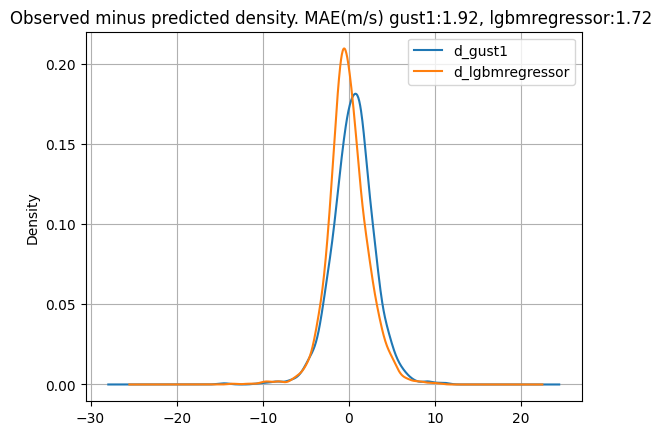

In [7]:
# @title LGBMRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
d_lgbmregressor = df_results['d_lgbmregressor']
df_results[["d_gust1","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor:{:0.2f} ".format(e_gust1,e_lgbm));

In [8]:
# @title Shapiro test normality MAE samples tested
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")


p value: 0.5161249041557312
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


In [9]:
# @title T test (1sample) compare machine learning mean absolute error in a sample (n=10) versus meteorological model mean absolute error at point 1 (wind_gust1 =1.92). The alternative hypothesis is: the sample mean absolute error of the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01

from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=1.92, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [1.7, 1.7, 1.66, 1.68, 1.72, 1.7, 1.71, 1.69, 1.69, 1.72]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 14945, number of used features: 10
[LightGBM] [Info] Start training from score 7.355959
machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.232112     7.242991     0.010879
std       4.723555     4.279999     2.080509
min       0.000000    -0.126616   -11.043332
25%       3.833336     4.300761    -1.064591
50%       5.861116     5.685857     0.128731
75%       9.361119     8.933702     1.161556
max      31.750025    25.540029    13.298277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of da

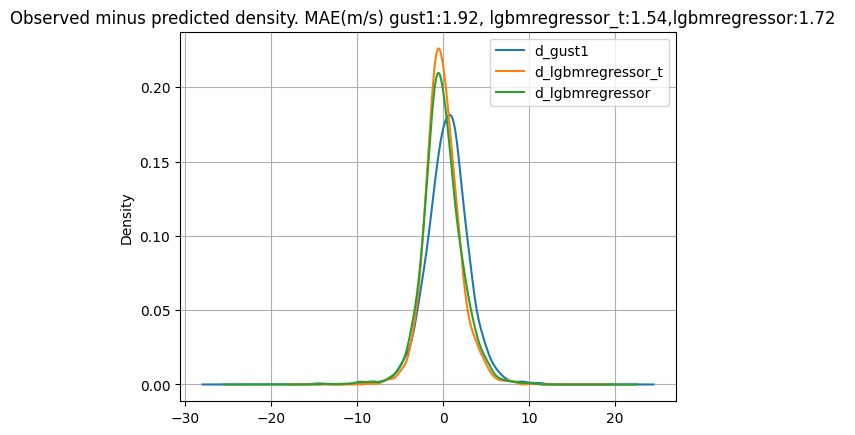

In [10]:
# @title Add time variables

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()
#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor_t"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm_t = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results["d_lgbmregressor"] = d_lgbmregressor
df_results[["d_gust1","d_lgbmregressor_t","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor_t:{:0.2f},lgbmregressor:{:0.2f}  ".format(e_gust1,e_lgbm_t,e_lgbm));


In [11]:
# @title T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")

#select mae_ml
mae_ml = np.round(MAE_t,3)[-1]


MAE without time variables: [1.7  1.7  1.66 1.68 1.72 1.7  1.71 1.69 1.69 1.72]

MAE with time variables: [1.53 1.53 1.49 1.46 1.56 1.51 1.53 1.56 1.54 1.54]

alpha:  0.01

p_value point:  1.4729647617360602e-09

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


In [12]:
# @title Save algorithm
import pickle
from sklearn.pipeline import Pipeline

score ={"MAE_met":mae_met,"MAE_ml":mae_ml}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/algorithms/gust_udra_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
